#### Null space - For extreamly small values

In [1]:
import pickle
import numpy as np
from scipy.linalg import null_space

In [2]:

# Load matrix from file
with open('matrix_mittelfranken.pkl', 'rb') as f:
    Q = pickle.load(f)

print("Q matrix which we got from adjacencies:")
print(Q)

Q matrix which we got from adjacencies:
[[ 1 -1  0  0  0  0  0  0  0  0  0  0]
 [-1  5  0  0  0 -1  0 -1  0 -1  0 -1]
 [ 0  0  5 -1  0 -1 -1 -1 -1  0  0  0]
 [ 0  0 -1  4 -1 -1  0  0 -1  0  0  0]
 [ 0  0  0 -1  3 -1  0  0 -1  0  0  0]
 [ 0 -1 -1 -1 -1  7  0 -1 -1 -1  0  0]
 [ 0  0 -1  0  0  0  3  0 -1 -1  0  0]
 [ 0 -1 -1  0  0 -1  0  3  0  0  0  0]
 [ 0  0 -1 -1 -1 -1 -1  0  7 -1 -1  0]
 [ 0 -1  0  0  0 -1 -1  0 -1  6 -1 -1]
 [ 0  0  0  0  0  0  0  0 -1 -1  2  0]
 [ 0 -1  0  0  0  0  0  0  0 -1  0  2]]


In [3]:
print(Q.shape)
print(type(Q))
print(type(Q[0,0]))

(12, 12)
<class 'numpy.ndarray'>
<class 'numpy.int64'>


In [4]:
print("The Rank of the Q Matrix: ", np.linalg.matrix_rank(Q))

The Rank of the Q Matrix:  11


In [5]:
# get the determinant of the matrix
det = np.linalg.det(Q)
det

6.559690316036448e-11

##### Precision matrix regularized

In [6]:
# Make the Precision Matrix Regularized
epsilon = 1e-12  # small term to add to the diagonal
Q_regularized = Q + epsilon * np.eye(Q.shape[0])

In [7]:
Q_regularized

array([[ 1., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  5.,  0.,  0.,  0., -1.,  0., -1.,  0., -1.,  0., -1.],
       [ 0.,  0.,  5., -1.,  0., -1., -1., -1., -1.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  4., -1., -1.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  3., -1.,  0.,  0., -1.,  0.,  0.,  0.],
       [ 0., -1., -1., -1., -1.,  7.,  0., -1., -1., -1.,  0.,  0.],
       [ 0.,  0., -1.,  0.,  0.,  0.,  3.,  0., -1., -1.,  0.,  0.],
       [ 0., -1., -1.,  0.,  0., -1.,  0.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1., -1., -1., -1., -1.,  0.,  7., -1., -1.,  0.],
       [ 0., -1.,  0.,  0.,  0., -1., -1.,  0., -1.,  6., -1., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1., -1.,  2.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  0.,  2.]])

In [8]:
print("The Rank of the Q regulized Matrix: ", np.linalg.matrix_rank(Q_regularized))

# get the determinant of the matrix
det = np.linalg.det(Q_regularized)
print("The determinant of the regularized matrix: ", det)

# Compute the Null Space V of Q
V = null_space(Q_regularized)
print("The Null Space of the regularized matrix: ")
V


The Rank of the Q regulized Matrix:  12
The determinant of the regularized matrix:  8.413543710538611e-07
The Null Space of the regularized matrix: 


array([], shape=(12, 0), dtype=float64)

In [9]:
# checking the null space matrix
Q.dot(V)

array([], shape=(12, 0), dtype=float64)

____________________

In [60]:
# b matrix
b = null_space(V.transpose())

In [53]:
# find covariance of matrix b
cov_b = np.cov(b)

### Find the Cov(b| V^T b=0)

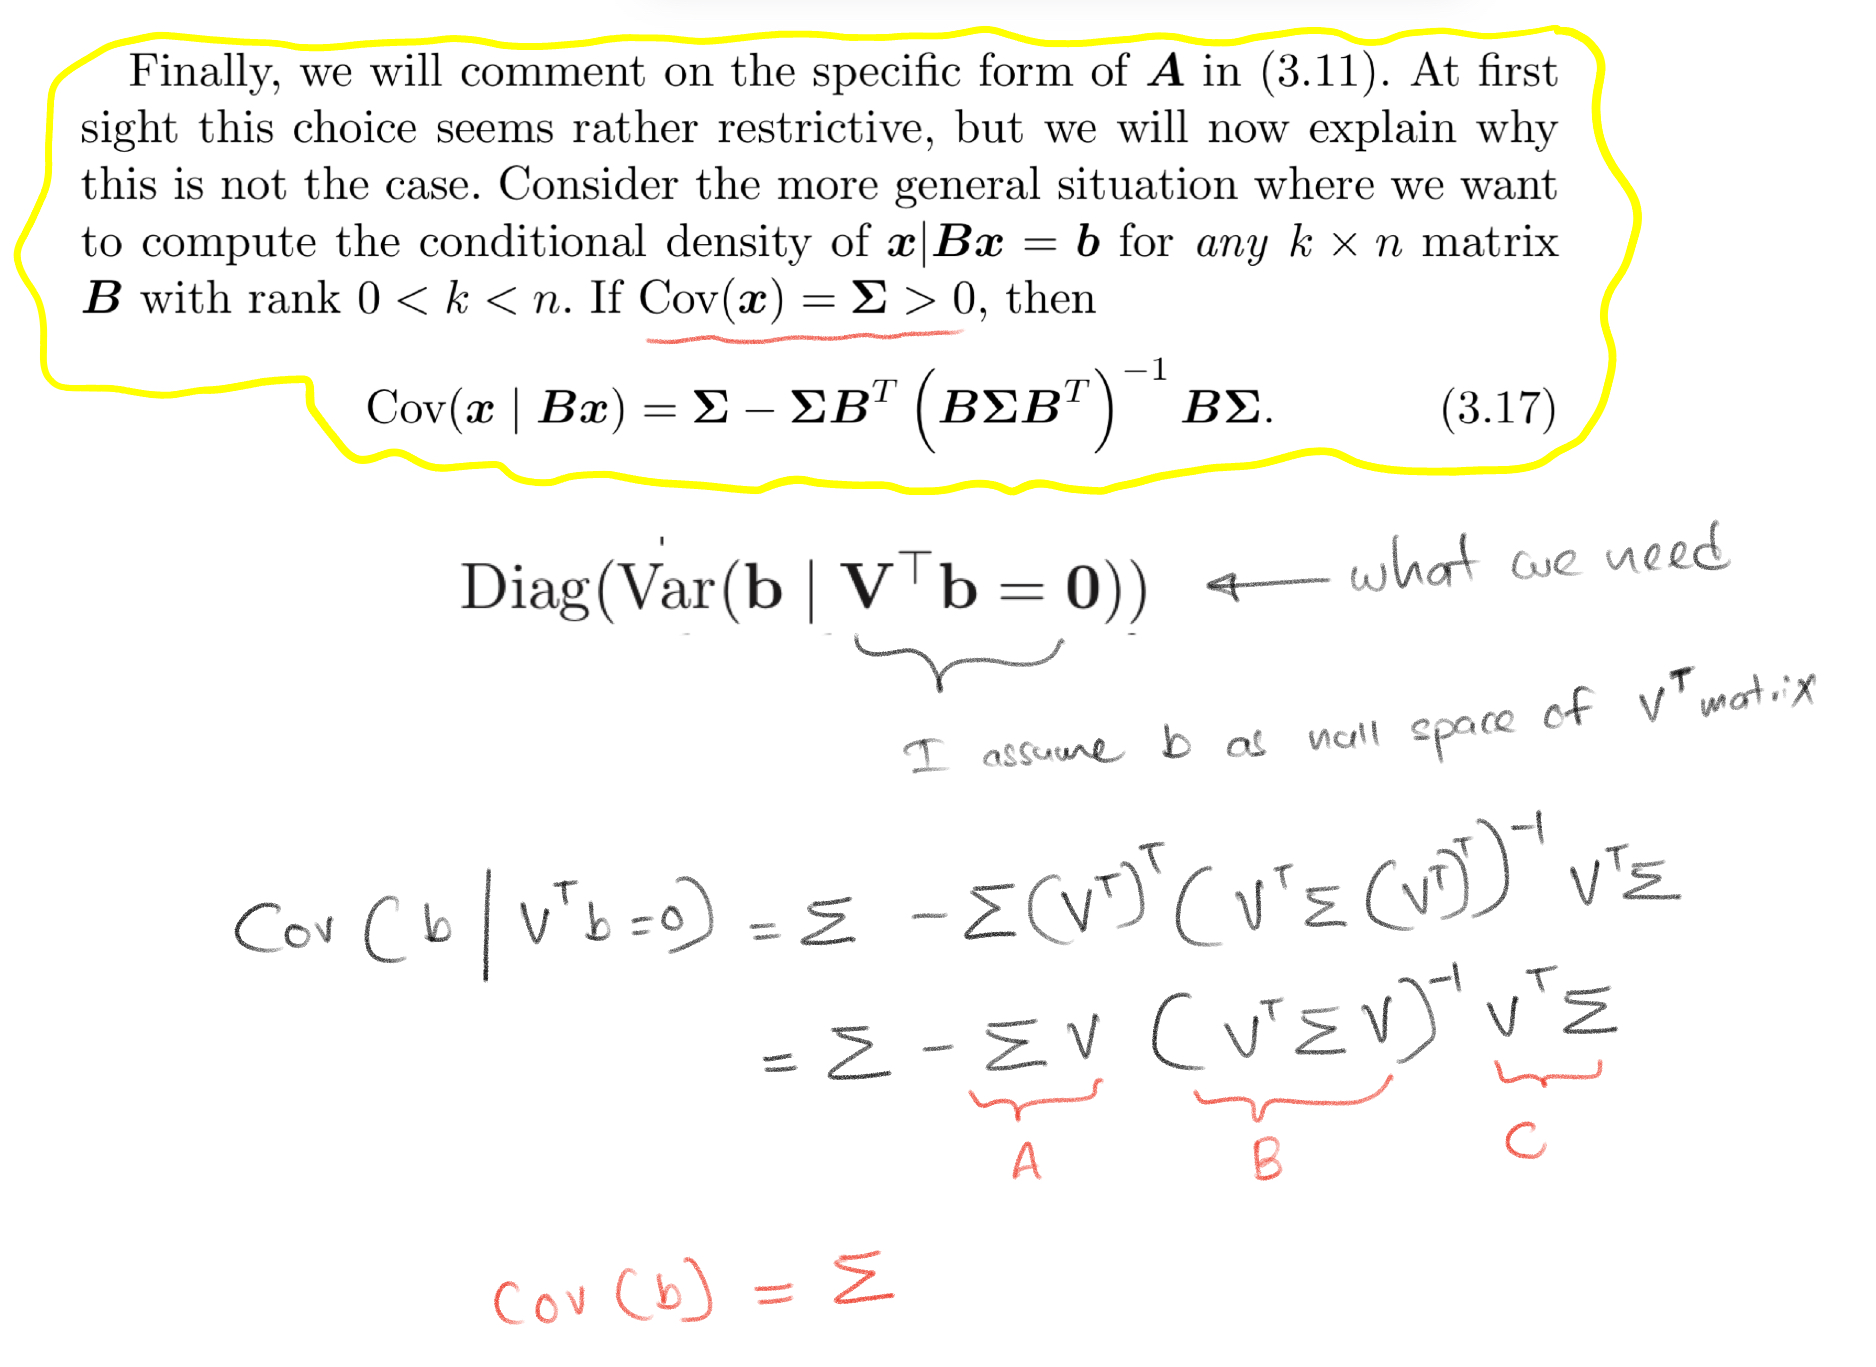

In [59]:
from IPython.display import Image
Image(filename='IMG_0404.PNG',width=800, height=400)

In [39]:
A = cov_b.dot(V)

In [40]:
# inverse of A
B = np.linalg.inv(V.transpose().dot(cov_b).dot(V))

In [41]:
C = V.transpose().dot(cov_b)

In [42]:
equation = cov_b - A.dot(B).dot(C)

In [43]:
cov_b_VTb = np.cov(equation)

In [44]:
# Extract Marginal Variances (diagonal elements of the variance-covariance matrix)
marginal_variances = np.diag(cov_b_VTb)

print("Marginal Variances:", marginal_variances)

Marginal Variances: [2.23089538e-34 8.26446281e-04 8.26446281e-04 8.26446281e-04
 8.26446281e-04 8.26446281e-04 8.26446281e-04 8.26446281e-04
 8.26446281e-04 8.26446281e-04 8.26446281e-04 8.26446281e-04]


In [45]:
# Format and print the marginal variances
print("Marginal Variances:")
for variance in marginal_variances:
    print("{:.12f}".format(variance))

Marginal Variances:
0.000000000000
0.000826446281
0.000826446281
0.000826446281
0.000826446281
0.000826446281
0.000826446281
0.000826446281
0.000826446281
0.000826446281
0.000826446281
0.000826446281


In [46]:
# get the sum of the diagonal of the covariance matrix
sum_diag = np.sum(np.diag(cov_b_VTb))
sum_diag

0.009090909090909085